# 导入包

In [1]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# gensim.downloader

In [2]:
from gensim.downloader import load

# 加载预训练的Word2Vec模型
model = load('word2vec-google-news-300')


ValueError: unable to read local cache 'C:\\Users\\五行缺钱/gensim-data\\information.json' during fallback, connect to the Internet and retry

In [3]:
word = 'manba'

# 使用模型获取单词的词向量
word_vector = model[word]

# 使用模型找到与给定单词最相似的单词
similar_words = model.most_similar(word)

# 打印结果
print(f"Vector for {word}: {word_vector}")
print(f"Most similar words to {word}: {similar_words}")

NameError: name 'model' is not defined

# PCA～可视化

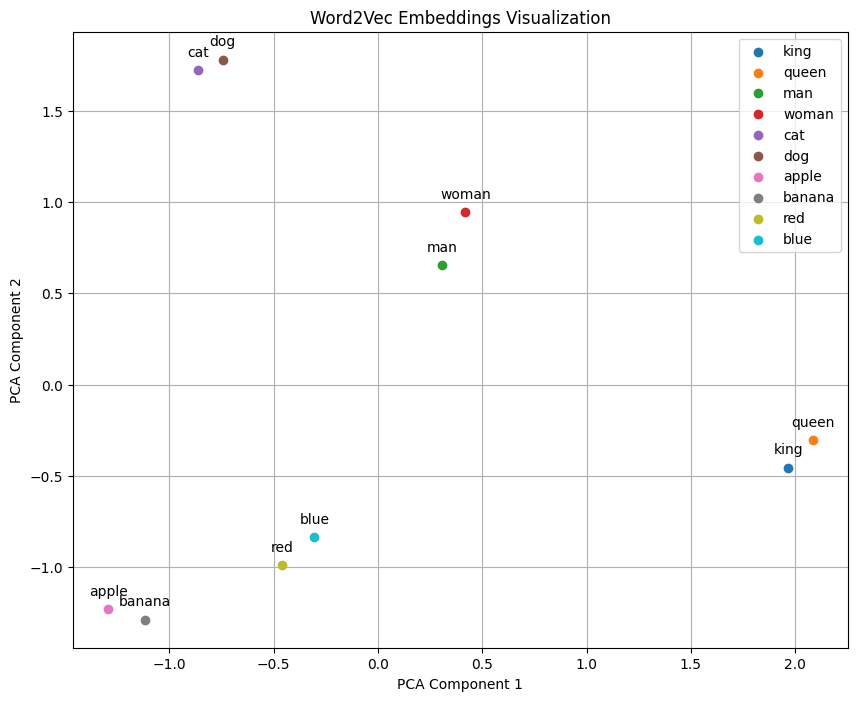

In [3]:
# 选择一些单词进行展示
words = ['king', 'queen', 'man', 'woman', 'cat', 'dog', 'apple', 'banana', 'red', 'blue']
# words = [
#     'king', 'queen', 'man', 'woman',  # 王室
#     'cat', 'dog', 'lion', 'tiger',     # 动物
#     'apple', 'banana', 'orange', 'grape',  # 水果
#     'red', 'blue', 'green', 'yellow'   # 颜色
# ]
vectors = [model[word] for word in words if word in model]

# 使用PCA进行降维到2维
pca = PCA(n_components=2)
new_vectors = pca.fit_transform(vectors)

# 绘制二维散点图
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    if word in model:
        plt.scatter(new_vectors[i, 0], new_vectors[i, 1], label=word)
        plt.annotate(word, (new_vectors[i, 0], new_vectors[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.title('Word2Vec Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

# 对比分析

In [4]:
import numpy as np
np.mean(np.abs((model['king'] - model['queen']) - (model['man'] - model['women'])))

0.15798464

In [5]:
np.mean(np.abs((model['king'] - model['queen']) - (model['apple'] - model['women'])))

0.20700794

In [6]:
np.mean(np.abs((model['king'] - model['queen']) - (model['dog'] - model['apple'])))

0.2165377